# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
from numpy.random import randint
import numpy as np
from collections import Counter
from sklearn.utils import shuffle
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_train) + 1

X_sort_array = np.concatenate((X_train, X_valid), axis=0)
y_sort_array = np.concatenate((y_train, y_valid), axis=0)
X_sort_array, y_sort_array = shuffle(X_sort_array, y_sort_array)
freq = Counter(y_sort_array)

# Maximum number of each type of image allowed.
max_value = 1200

# Ensure that at least 100 images of each type exist in validation set.
ensure = 100

# If the above two constraints can't be met, then 90% of the imagaes will go into training set.
ratio = 0.9

# Calculate the number of images going into training set
limits = [0]*(n_classes)
sum_value = 0
for t_signs in range(n_classes):
    if freq[t_signs] > max_value:
        if (freq[t_signs] - max_value) < ensure:
            sign_max = int(np.ceil(freq[t_signs]*ratio))
        else:
            sign_max = max_value
    else:
        sign_max = int(np.ceil(freq[t_signs]*ratio))
    sum_value += sign_max
    limits[t_signs] = sign_max

# Initialize variables
X_train_new = np.zeros((sum_value, 32, 32, 3),dtype='uint8')
y_train_new = np.zeros((sum_value,),dtype='uint8')
X_valid_new = np.zeros((len(y_sort_array)-sum_value, 32, 32, 3),dtype='uint8')
y_valid_new = np.zeros((len(y_sort_array)-sum_value,),dtype='uint8')
counter = [0]*(n_classes)
tracker_train = 0
tracker_valid = 0

# Sort images
for ind in range(len(y_sort_array)):
    value = y_sort_array[ind]
    total = freq[value]
    spec_max = limits[value]
        
    if counter[value] < spec_max:
        X_train_new[tracker_train][:,:,:] = X_sort_array[ind]
        y_train_new[tracker_train] = value
        counter[value] += 1
        tracker_train += 1

    elif counter[value] >= spec_max:
        X_valid_new[tracker_valid][:,:,:] = X_sort_array[ind]
        y_valid_new[tracker_valid] = value
        tracker_valid += 1

print (tracker_train, tracker_valid)
print (X_train_new.shape, y_train_new.shape)
print (X_valid_new.shape, y_valid_new.shape)
# TODO: Number of training examples
n_train = len(X_train_new)

# TODO: Number of validation examples
n_validation = len(X_valid_new)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of a traffic sign image?
image_shape = X_train_new[randint(0,n_train)].shape

print("Number of training examples =", n_train)
print("Number of validation examples=", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

29409 9800
(29409, 32, 32, 3) (29409,)
(9800, 32, 32, 3) (9800,)
Number of training examples = 29409
Number of validation examples= 9800
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

11
Right-of-way at the next intersection


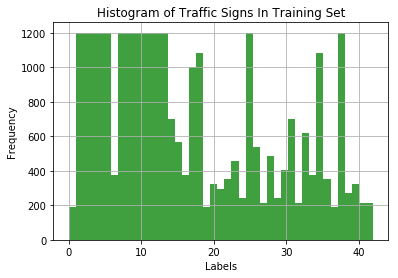

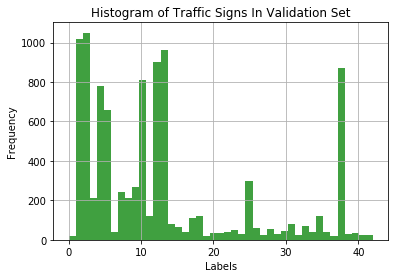

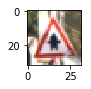

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import csv
import cv2
from collections import Counter
%matplotlib inline

def histogram_signs(y_train, n_classes, title):
    n, bins, patches = plt.hist(y_train, n_classes, facecolor='green', alpha=0.75)
    plt.xlabel('Labels')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.grid(True)

plt.figure(1)
histogram_signs(y_train_new, n_classes, 'Histogram of Traffic Signs In Training Set')
plt.figure(2)
histogram_signs(y_valid_new, n_classes, 'Histogram of Traffic Signs In Validation Set')
    
def convert_data(n, X):
    
    # Condition when only certain images need to be viewed
    if n == 1:
        return cv2.cvtColor(X, cv2.COLOR_RGB2GRAY).reshape(n,32,32,1)
        
    im_gray = np.zeros((n,32,32),dtype=np.uint8) 
    cl1 = np.zeros((n,32,32),dtype='uint8') 
    
    for i in range(n):
        im_gray[i] = cv2.cvtColor(X[i], cv2.COLOR_RGB2GRAY)
        
    im_gray = im_gray.reshape(n,32,32,1)
    return im_gray

with open('signnames.csv', 'r') as f:
    signames = csv.reader(f)
    signames = dict(signames)

index = (randint(0,n_train))
print (y_train_new[index])
label = str(y_train_new[index])

image = X_train_new[index]
# gray = convert_data(1, image).squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap = plt.get_cmap('gray'))
print (signames[label])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# Make copies
X_train_grey = X_train_new
y_train_grey = y_train_new
X_valid_grey = X_valid_new
X_test_grey = X_test

# Normalize
X_train_grey = (X_train_grey-128.0)/128
X_valid_grey = (X_valid_grey-128.0)/128
X_test_grey = (X_test_grey-128.0)/128

### Model Architecture

In [5]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 15
BATCH_SIZE = 192

def LeNet(x):
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x18.
    wc = tf.Variable(tf.truncated_normal(shape=(5,5,3,18),mean=mu,stddev=sigma))
    bc = tf.Variable(tf.zeros(18))
    
    x = tf.nn.conv2d(x, wc, strides=[1,1,1,1], padding='VALID') + bc

    # Activation.
    x = tf.nn.relu(x)

    # Pooling. Input = 28x28x18. Output = 14x14x18.
    x = tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    # Layer 2: Convolutional. Output = 12x12x54.
    wc_1 = tf.Variable(tf.truncated_normal((3,3,18,54),mu,sigma))
    bc_1 = tf.Variable(tf.zeros(54))
    
    x = tf.nn.conv2d(x, wc_1, strides=[1,1,1,1], padding='VALID') + bc_1
    
    # Activation.
    x = tf.nn.relu(x)
    
    # Pooling. Input = 12x12x54. Output = 6x6x54.
    x = tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

    # Layer 3: Convolutional. Output = 4x4x162.
    wc_2 = tf.Variable(tf.truncated_normal((3,3,54,162),mu,sigma))
    bc_2 = tf.Variable(tf.zeros(162))
    
    x = tf.nn.conv2d(x, wc_2, strides=[1,1,1,1], padding='VALID') + bc_2
    
    # Activation.
    x = tf.nn.relu(x)
    
    # Pooling. Input = 4x4x162. Output = 2x2x162.
    x = tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    # Layer 4: Convolutional. Output = 1x1x486.
    wc_3 = tf.Variable(tf.truncated_normal((2,2,162,486),mu,sigma))
    bc_3 = tf.Variable(tf.zeros(486))
    
    x = tf.nn.conv2d(x, wc_3, strides=[1,1,1,1], padding='VALID') + bc_3
    
    # Activation.
    x = tf.nn.relu(x)
    
    # Flatten. Input = 1x1x486. Output = 486.
    x = flatten(x)
    
    # Layer 5: Fully Connected. Input = 486. Output = 380.
    w_fc = tf.Variable(tf.truncated_normal((486,380),mu,sigma))
    b_fc = tf.Variable(tf.zeros(380))
    
    x = tf.reshape(x, [-1, w_fc.get_shape().as_list()[0]])
    x = tf.add(tf.matmul(x, w_fc), b_fc)
    
    # Activation.
    x = tf.nn.relu(x)
    
    # Dropout
    x = tf.nn.dropout(x, keep_prob)

    # Layer 6: Fully Connected. Input = 380. Output = 120.
    w_fc_1 = tf.Variable(tf.truncated_normal((380,120),mu,sigma))
    b_fc_1 = tf.Variable(tf.zeros(120))
    
    x = tf.reshape(x, [-1, w_fc_1.get_shape().as_list()[0]])
    x = tf.add(tf.matmul(x, w_fc_1), b_fc_1)
    
    # Activation.
    x = tf.nn.relu(x)
    
    # Dropout
    x = tf.nn.dropout(x, keep_prob)

    # Layer 7: Fully Connected. Input = 120. Output = 50.
    w_fc_2 = tf.Variable(tf.truncated_normal((120,50),mu,sigma))
    b_fc_2 = tf.Variable(tf.zeros(50))
    
    x = tf.reshape(x, [-1, w_fc_2.get_shape().as_list()[0]])
    x = tf.add(tf.matmul(x, w_fc_2), b_fc_2)
    
    # Activation.
    x = tf.nn.relu(x)
    
    # Dropout
    x = tf.nn.dropout(x, keep_prob)

    # Layer 8: Fully Connected. Input = 50. Output = 43.
    w_fc_3 = tf.Variable(tf.truncated_normal((50,43),mu,sigma))
    b_fc_3 = tf.Variable(tf.zeros(43))
    
    x = tf.reshape(x, [-1, w_fc_3.get_shape().as_list()[0]])
    logits = tf.add(tf.matmul(x, w_fc_3), b_fc_3)
    
    return logits

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

rate = 0.0006

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [6]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_grey)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_grey, y_train_grey = shuffle(X_train_grey, y_train_grey)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_grey[offset:end], y_train_grey[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.7})
            
        validation_accuracy = evaluate(X_valid_grey, y_valid_new)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.635

EPOCH 2 ...
Validation Accuracy = 0.884

EPOCH 3 ...
Validation Accuracy = 0.959

EPOCH 4 ...
Validation Accuracy = 0.969

EPOCH 5 ...
Validation Accuracy = 0.975

EPOCH 6 ...
Validation Accuracy = 0.981

EPOCH 7 ...
Validation Accuracy = 0.983

EPOCH 8 ...
Validation Accuracy = 0.982

EPOCH 9 ...
Validation Accuracy = 0.989

EPOCH 10 ...
Validation Accuracy = 0.988

EPOCH 11 ...
Validation Accuracy = 0.988

EPOCH 12 ...
Validation Accuracy = 0.989

EPOCH 13 ...
Validation Accuracy = 0.993

EPOCH 14 ...
Validation Accuracy = 0.991

EPOCH 15 ...
Validation Accuracy = 0.990

Model saved


In [7]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    training_accuracy = evaluate(X_train_grey, y_train_grey)
    print ("Training Accuracy = {:.3f}".format(training_accuracy))
    test_accuracy = evaluate(X_test_grey, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Training Accuracy = 0.998
Test Accuracy = 0.944


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

999
1200
1200
621
1200


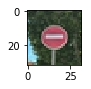

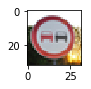

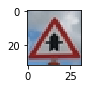

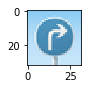

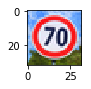

In [8]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os

X_six = np.zeros((5,32,32,3))
y_six = [17, 9, 11, 33, 4]
y_train_freq = Counter(y_train_grey)
images = os.listdir('new_pics')

for j in range(len(images)):
    image = images[j]
    img = mpimg.imread(os.path.join('new_pics',image),1)
    
    X_six[j] = img
    plt.figure(figsize=(1,1))
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    print (y_train_freq[y_six[j]])

### Predict the Sign Type for Each Image

In [9]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

import tensorflow as tf

X_six = (X_six - 128.0)/128

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./lenet")
    my_accuracy = evaluate(X_six, y_six)
    print("Accuracy = {:.3f}".format(my_accuracy))

Accuracy = 1.000


### Analyze Performance

In [10]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print("Accuracy = {:.0f}%".format(my_accuracy*100))

Accuracy = 100%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [11]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
softmax_logits = tf.nn.softmax(logits)
top_probs = tf.nn.top_k(softmax_logits, k=5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./lenet")
    softmax = sess.run(softmax_logits, feed_dict={x: X_six, keep_prob: 1})
    probs = sess.run(top_probs, feed_dict={x: X_six, keep_prob: 1})
    print(probs)

TopKV2(values=array([[  7.20790863e-01,   1.12804592e-01,   5.52680865e-02,
          4.20442000e-02,   2.02408135e-02],
       [  1.00000000e+00,   2.11563459e-16,   8.61099024e-20,
          1.24342492e-21,   5.68879784e-22],
       [  1.00000000e+00,   5.69262302e-13,   2.18051063e-17,
          7.49665483e-24,   2.05941665e-24],
       [  1.00000000e+00,   7.46177859e-12,   1.29588148e-12,
          7.48224074e-13,   5.15096483e-13],
       [  9.98605311e-01,   1.36879063e-03,   2.59453464e-05,
          1.36734396e-12,   1.72256229e-14]], dtype=float32), indices=array([[17, 23, 38, 20, 41],
       [ 9, 10, 16, 15,  3],
       [11, 30, 21,  6, 27],
       [33, 34, 35, 39, 19],
       [ 4,  1,  0,  2, 29]]))


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.